In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import pylab

Matplotlib is building the font cache; this may take a moment.


In [2]:
#load Dataset
Google = pd.read_csv('./GOOG.csv')
Google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-01,280.448822,284.717804,280.149933,281.121277,281.121277,7536300
1,2010-12-02,283.268250,285.594513,281.619415,284.842346,284.842346,5114800
2,2010-12-03,283.661774,287.163635,282.939484,285.430145,285.430145,5282000
3,2010-12-06,289.200989,289.913330,287.228394,288.100128,288.100128,4203200
4,2010-12-07,294.531036,295.392792,291.905853,292.473724,292.473724,6107100


In [3]:
#Overview of Dataset Characteristics
Google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [4]:
#Show Key Statistics
Google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,752.692540,759.647990,745.753984,752.942987,752.942987,2.871047e+06
std,378.179171,382.678903,374.356208,378.680162,378.680162,2.352588e+06
min,236.114990,239.477386,235.626816,236.553345,236.553345,7.900000e+03
25%,432.304626,435.353180,430.157654,432.498901,432.498901,1.382200e+06
50%,698.090027,703.789978,690.585022,697.460022,697.460022,1.978700e+06
75%,1076.079956,1086.589966,1062.790039,1076.280029,1076.280029,3.841500e+06
max,1790.900024,1818.060059,1772.439941,1793.189941,1793.189941,2.819250e+07


In [5]:
#Summary of N/A Values
Google.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

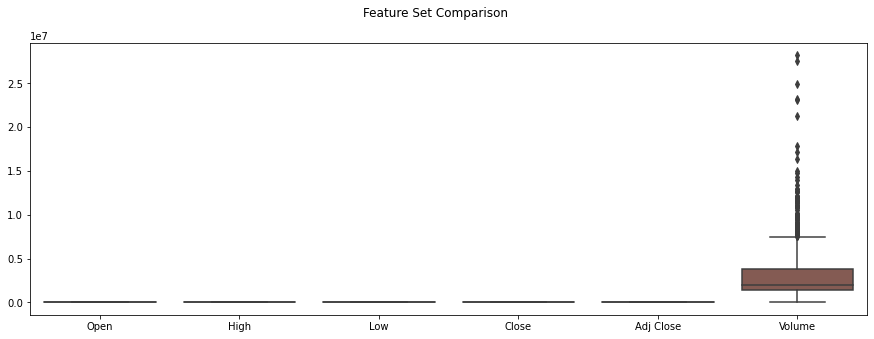

In [6]:
#BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=Google)
plt.show()

In [7]:
#SWEETVIZ Repot
import sweetviz as sv
dataset_report = sv.analyze(Google)
dataset_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


<AxesSubplot:>

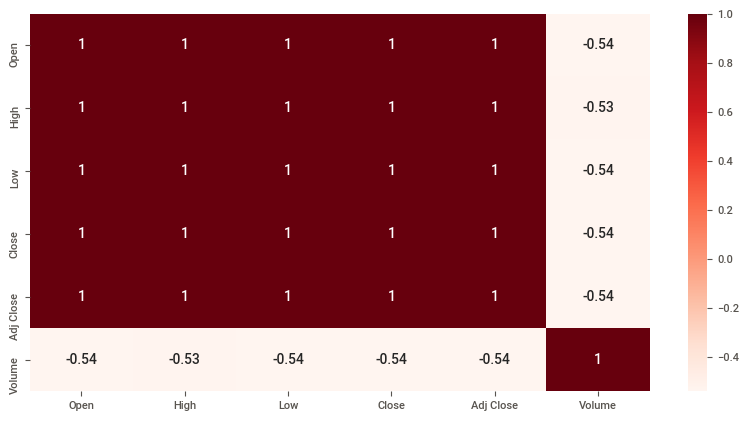

In [8]:
#Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(Google.corr(),annot=True,cmap="Reds")

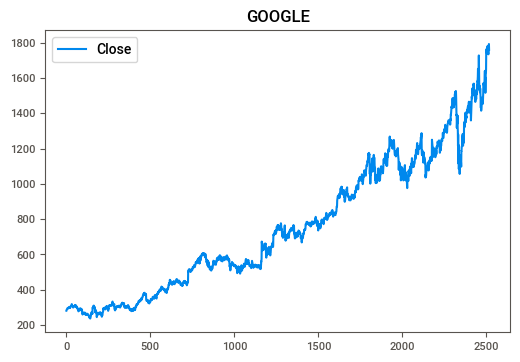

In [9]:
Google[['Close']].plot()
plt.title("GOOGLE")
plt.show()

Text(0.5, 1.0, 'Microsoft Cumulative Returns')

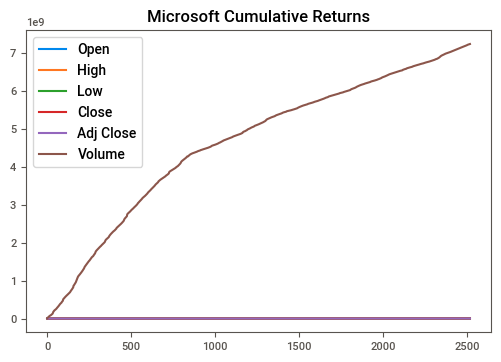

In [10]:
# Comulative Return
dr = Google.cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

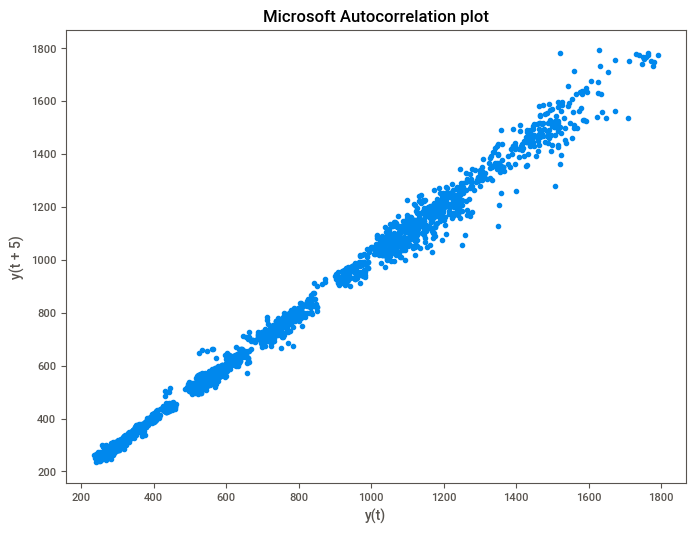

In [11]:
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
plt.figure(figsize=(8,6))
lag_plot(Google['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

In [14]:
print("\n")
print("Open   --- mean :", np.mean(Google['Open']),  "  \t Std: ", np.std(Google['Open']),  "  \t Max: ", np.max(Google['Open']),  "  \t Min: ", np.min(Google['Open']))
print("High   --- mean :", np.mean(Google['High']),  "  \t Std: ", np.std(Google['High']),  "  \t Max: ", np.max(Google['High']),  "  \t Min: ", np.min(Google['High']))
print("Low    --- mean :", np.mean(Google['Low']),   "  \t Std: ", np.std(Google['Low']),   "  \t Max: ", np.max(Google['Low']),   "  \t Min: ", np.min(Google['Low']))
print("Close  --- mean :", np.mean(Google['Close']), "  \t Std: ", np.std(Google['Close']), "  \t Max: ", np.max(Google['Close']), "  \t Min: ", np.min(Google['Close']))
print("Volume --- mean :", np.mean(Google['Volume']),"  \t Std: ", np.std(Google['Volume']),"  \t Max: ", np.max(Google['Volume']),"  \t Min: ", np.min(Google['Volume']))



Open   --- mean : 752.6925401867302   	 Std:  378.1040385017371   	 Max:  1790.9000239999998   	 Min:  236.11498999999998
High   --- mean : 759.6479897874444   	 Std:  382.60287645059674   	 Max:  1818.060059   	 Min:  239.477386
Low    --- mean : 745.7539837258638   	 Std:  374.2818347272053   	 Max:  1772.439941   	 Min:  235.62681600000002
Close  --- mean : 752.9429874902654   	 Std:  378.6049301671581   	 Max:  1793.189941   	 Min:  236.553345
Volume --- mean : 2871046.6428287644   	 Std:  2352120.7397563118   	 Max:  28192500   	 Min:  7900
